# Time-Series Forecasting
Time-series forecasting in simple words means to forecast or to predict the future value(eg-stock price) over a period of time. There are different approaches to predict the value, consider an example there is a company XYZ records the website traffic in each hour and now wants to forecast the total traffic of the coming hour. If I ask you what will your approach to forecasting the upcoming hour traffic?

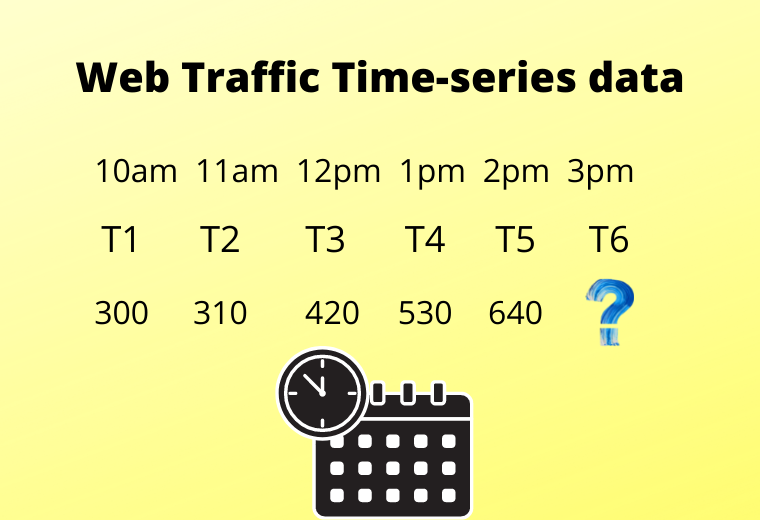

A different person can have a different perspective like one can say find the mean of all observations, one can have like take mean of recent two observations, one can say like give more weightage to current observation and less to past, or one can say use interpolation. There are different methods to forecast the values.

while Forecasting time series values, 3 important terms need to be taken care of and the main task of time series forecasting is to forecast these three terms.



## 1) Seasonality

Seasonality is a simple term that means while predicting a time series data there are some months in a particular domain where the output value is at a peak as compared to other months. for example if you observe the data of tours and travels companies of past 3 years then you can see that in November and December the distribution will be very high due to holiday season and festival season. So while forecasting time series data we need to capture this seasonality.

## 2) Trend

The trend is also one of the important factors which describe that there is certainly increasing or decreasing trend time series, which actually means the value of organization or sales over a period of time and seasonality is increasing or decreasing.

## 3) Unexpected Events

Unexpected events mean some dynamic changes occur in an organization, or in the market which cannot be captured. for example a current pandemic we are suffering from, and if you observe the Sensex or nifty chart there is a huge decrease in stock price which is an unexpected event that occurs in the surrounding.

Methods and algorithms are using which we can capture seasonality and trend But the unexpected event occurs dynamically so capturing this becomes very difficult.

### When Is Time-Series Forecasting Useful?

Even though time-series forecasting may seem like a universally applicable technique, developers need to be aware of some limitations. Because forecasting isn’t a strictly defined method but rather a combination of data analysis techniques, analysts and data scientists must consider the limitations of the prediction models and the data itself. 

The most crucial step when considering time-series forecasting is understanding your data model and knowing which business questions need to be answered using this data. By diving into the problem domain, a developer can more easily distinguish random fluctuations from stable and constant trends in historical data. This is useful when tuning the prediction model to generate the best forecasts and even considering the method to use. 

## Overview of Time-Series Forecasting Methods

- Time-series decomposition
- Time-series regression models
- Exponential smoothing
- ARIMA models
- Neural networks
- TBATS

### Time-Series Decomposition

Time-series decomposition is a method for explicitly modeling the data as a combination of seasonal, trend, cycle, and remainder components instead of modeling it with temporal dependencies and autocorrelations. It can either be performed as a standalone method for time-series forecasting or as the first step in better understanding your data.

When using a decomposition model, you need to forecast future values for each component above and then sum these predictions to find the most accurate overall forecast. The most relevant decomposition forecasting techniques using decomposition are Seasonal-Trend decomposition using LOESS, Bayesian structural time series (BSTS), and Facebook Prophet.



### Time-Series Regression Models

Time-series regression is a statistical method for forecasting future values based on historical data. The forecast variable is also called the regressand, dependent, or explained variable. The predictor variables are sometimes called the regressors, independent, or explanatory variables. Regression algorithms attempt to calculate the line of best fit for a given dataset. For example, a linear regression algorithm could try to minimize the sum of the squares of the differences between the observed value and predicted value to find the best fit.

### Exponential Smoothing

When it comes to time-series forecasting, data smoothing can tremendously improve the accuracy of our predictions by removing outliers from a time-series dataset. Smoothing leads to increased visibility of distinct and repeating patterns hidden between the noise.

Exponential smoothing is a rule-of-thumb technique for smoothing time-series data using the exponential window function. Whereas the simple moving average method weighs historical data equally to make predictions, exponential smoothing uses exponential functions to calculate decreasing weights over time. Different types of exponential smoothing include simple exponential smoothing and triple exponential smoothing (also known as the Holt-Winters method).

### ARIMA Models

AutoRegressive Integrated Moving Average, or ARIMA, is a forecasting method that combines both an autoregressive model and a moving average model. Autoregression uses observations from previous time steps to predict future values using a regression equation. An autoregressive model utilizes a linear combination of past variable values to make forecasts.

### Neural Networks

Neural networks are also gaining traction regarding tasks such as classification and prediction. A neural network can sufficiently approximate any continuous functions for time-series forecasting. While classical methods like ARMA and ARIMA assume a linear relationship between inputs and outputs, neural networks are not bound by this constraint. They can approximate any nonlinear function without prior knowledge about the properties of the data series. 

## Conclusion

Time-series forecasting is a powerful method for predicting future trends and values in time-series data. Time-series forecasting holds tremendous value for your business development as it leverages historical data with a time component. While there are many forecasting methods to choose from, most of them are focused on specific situations and types of data, making it relatively easy to choose the right one.

### Let's build some models based on time series forecasting to understand more.

## Time Series Forecasting with ARIMA

As we already discussed above, ARIMA stands for Autoregressive Integrated Moving Average. It is an algorithm used for forecasting Time Series Data.

I will be using `Yahoo Finance` to collect the latest stock price data. Yahoo Finance is one of the most popular websites to collect stock price data.
To use it's API, we need to install it by using the pip command in our terminal or command prompt as mentioned below:

-     pip install yfinance

In [1]:
# Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import date, timedelta



In [2]:
# todays date 
today = date.today()
today

datetime.date(2024, 8, 1)

In [3]:
end_date = today.strftime("%Y-%m-%d")
print(f'End Date: {end_date}')

# previous year date
start_date = date.today() - timedelta(days = 365)
start_date = start_date.strftime("%Y-%m-%d")
print(f'Start Date: {start_date}')




End Date: 2024-08-01
Start Date: 2023-08-02


In [4]:
# Download the stock price data 
data = yf.download('GOOG', 
                      start=start_date, 
                      end=end_date, 
                      progress=False)

data['Date'] = data.index

data = data[["Date", "Open", "High", "Low", "Close", "Adj Close", "Volume"]]
data.reset_index(drop=True, inplace=True)
print(data.head())

        Date        Open        High         Low       Close   Adj Close  \
0 2023-08-02  129.839996  130.419998  127.849998  128.639999  128.493774   
1 2023-08-03  128.369995  129.770004  127.775002  128.770004  128.623642   
2 2023-08-04  129.600006  131.929993  128.315002  128.539993  128.393890   
3 2023-08-07  129.509995  132.059998  129.429993  131.940002  131.790039   
4 2023-08-08  130.979996  131.940002  130.130005  131.839996  131.690140   

     Volume  
0  22705800  
1  15018100  
2  20509500  
3  17621000  
4  16836000  


### We only need the date and close prices columns for the rest of the task, so let’s select both the columns and move further:

In [5]:
data = data[['Date', 'Close']]
data.head()

,Date,Close
0,2023-08-02,128.639999
1,2023-08-03,128.770004
2,2023-08-04,128.539993
3,2023-08-07,131.940002
4,2023-08-08,131.839996


### Now let’s visualize the close prices of Google before moving forward:

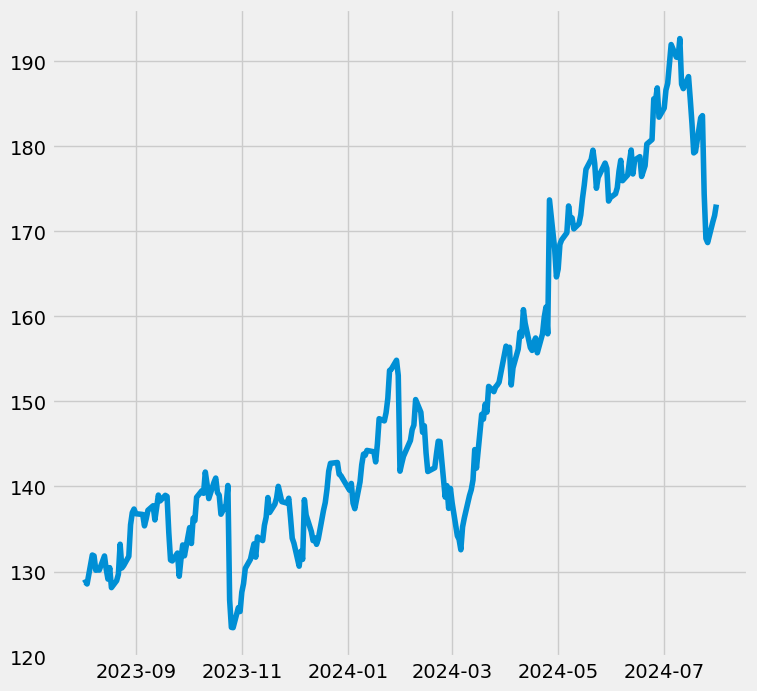

In [6]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(8, 8))
plt.plot(data.Date, data.Close)

## Using ARIMA for Time Series Forecasting

Before using the ARIMA model, we have to figure out whether our data is stationary or seasonal. The data visualization graph about the closing stock prices above shows that our dataset is not stationary. We can say so because the assumption of stationary data refers to the idea that the statistical properties of a time series do not change over time.

<Figure size 640x480 with 0 Axes>

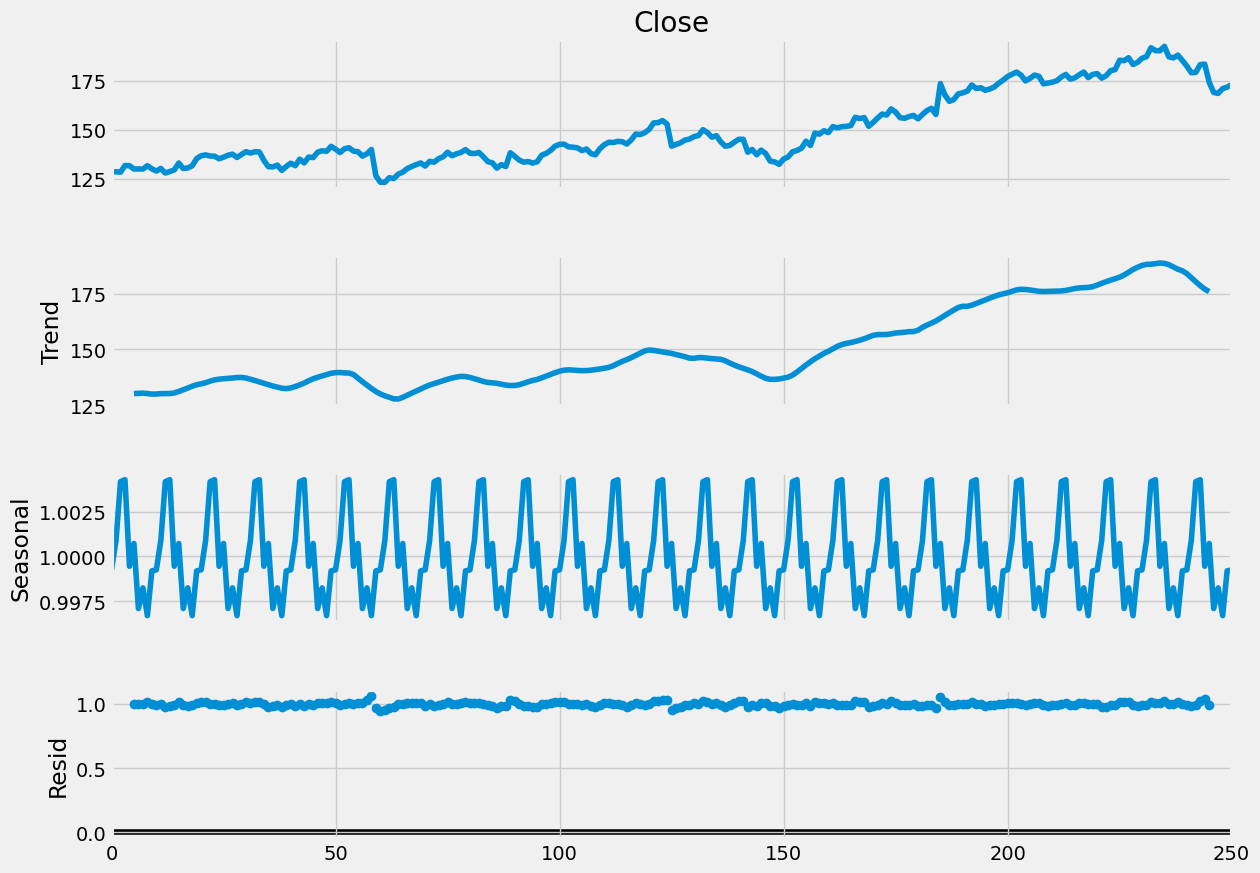

In [7]:
# libraries
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(data["Close"], 
                            model='multiplicative', period=10 )
fig = plt.figure()  
fig = result.plot()
fig.set_size_inches(15, 10)

So our data is not stationary it is seasonal. We need to use the Seasonal ARIMA (SARIMA) model for Time Series Forecasting on this data. But before using the SARIMA model, we will use the ARIMA model. It will help you learn using both models.

To use ARIMA or SARIMA, we need to find the p, d, and q values. We can find the value of p by plotting the autocorrelation of the Close column and the value of q by plotting the partial autocorrelation plot. The value of d is either 0 or 1. If the data is stationary, we should use 0, and if the data is seasonal, we should use 1. As our data is seasonal, we should use 1 as the d value.

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

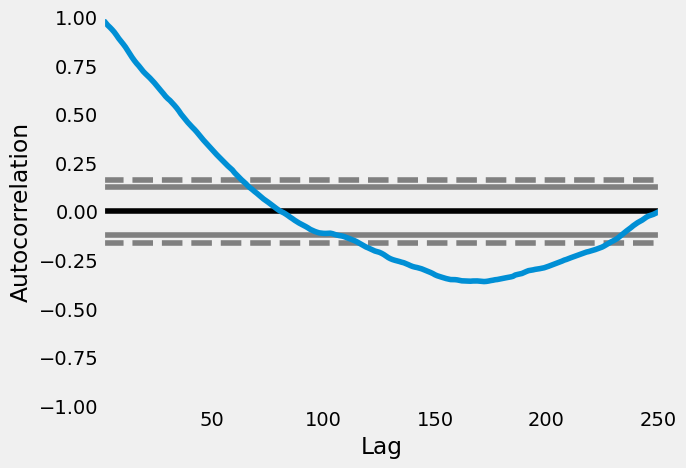

In [8]:
# here’s how to find the value of p:
pd.plotting.autocorrelation_plot(data.Close)

In the above autocorrelation plot, the curve is moving down after the 5th line of the first boundary. That is how to decide the p-value. Hence the value of p is 5. Now let’s find the value of q (moving average):

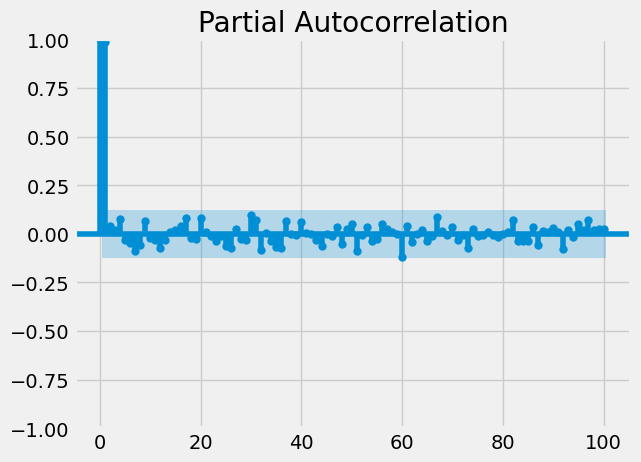

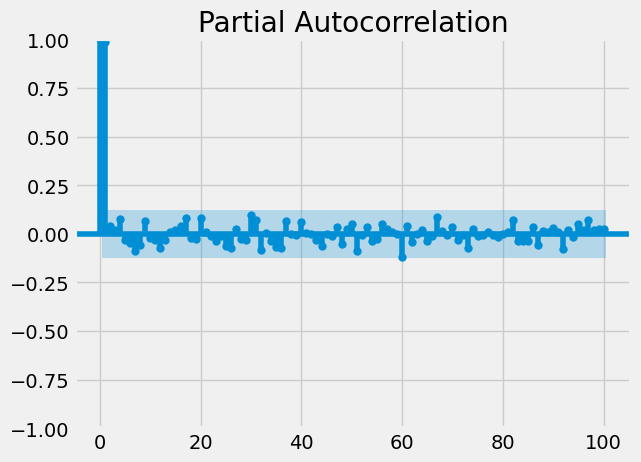

In [9]:
from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(data.Close, lags=100)

In [12]:
p, d, q = 5, 1, 2
import statsmodels.api as sm
model = sm.tsa.arima.ARIMA(data.Close, order=(p,d,q))
fitted = model.fit()  
print(fitted.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  251
Model:                 ARIMA(5, 1, 2)   Log Likelihood                -588.261
Date:                Thu, 01 Aug 2024   AIC                           1192.522
Time:                        14:21:21   BIC                           1220.694
Sample:                             0   HQIC                          1203.861
                                - 251                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5976      0.067     -8.933      0.000      -0.729      -0.466
ar.L2         -1.0159      0.096    -10.633      0.000      -1.203      -0.829
ar.L3         -0.1264      0.122     -1.033      0.3

/home/jagannath/100OfCode/env/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [13]:
# predict value using arima model

predictions = fitted.predict()
print(predictions)

0        0.000000
1      128.639952
2      128.762897
3      128.547897
4      131.744083
          ...    
246    174.889169
247    170.246721
248    168.726585
249    170.776967
250    172.567294
Name: predicted_mean, Length: 251, dtype: float64


In [14]:
import statsmodels.api as sm
import warnings
model=sm.tsa.statespace.SARIMAX(data['Close'],
                                order=(p, d, q),
                                seasonal_order=(p, d, q, 12))
model=model.fit()
print(model.summary())

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.42512D+00    |proj g|=  1.06506D-01

At iterate    5    f=  2.33492D+00    |proj g|=  5.15521D-02

At iterate   10    f=  2.29426D+00    |proj g|=  9.70491D-03

At iterate   15    f=  2.29232D+00    |proj g|=  4.20503D-03

At iterate   20    f=  2.29078D+00    |proj g|=  1.11322D-02

At iterate   25    f=  2.28612D+00    |proj g|=  5.11725D-03

At iterate   30    f=  2.28605D+00    |proj g|=  5.26369D-04

At iterate   35    f=  2.28600D+00    |proj g|=  3.59921D-03

At iterate   40    f=  2.28591D+00    |proj g|=  2.53870D-04

At iterate   45    f=  2.28591D+00    |proj g|=  8.92863D-05

At iterate   50    f=  2.28591D+00    |proj g|=  8.07488D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/home/jagannath/100OfCode/env/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                  251
Model:             SARIMAX(5, 1, 2)x(5, 1, 2, 12)   Log Likelihood                -573.763
Date:                            Thu, 01 Aug 2024   AIC                           1177.526
Time:                                    14:22:47   BIC                           1229.610
Sample:                                         0   HQIC                          1198.517
                                            - 251                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2601     10.465     -0.025      0.980     -20.770      20.250
ar.L2         -0.1139      5.415   

In [15]:
predictions = model.predict(len(data), len(data)+10)
print(predictions)

251    172.513303
252    171.239427
253    172.950123
254    173.416095
255    174.668494
256    174.538523
257    176.218169
258    176.168997
259    175.693700
260    175.248231
261    175.036227
Name: predicted_mean, dtype: float64


<Axes: >

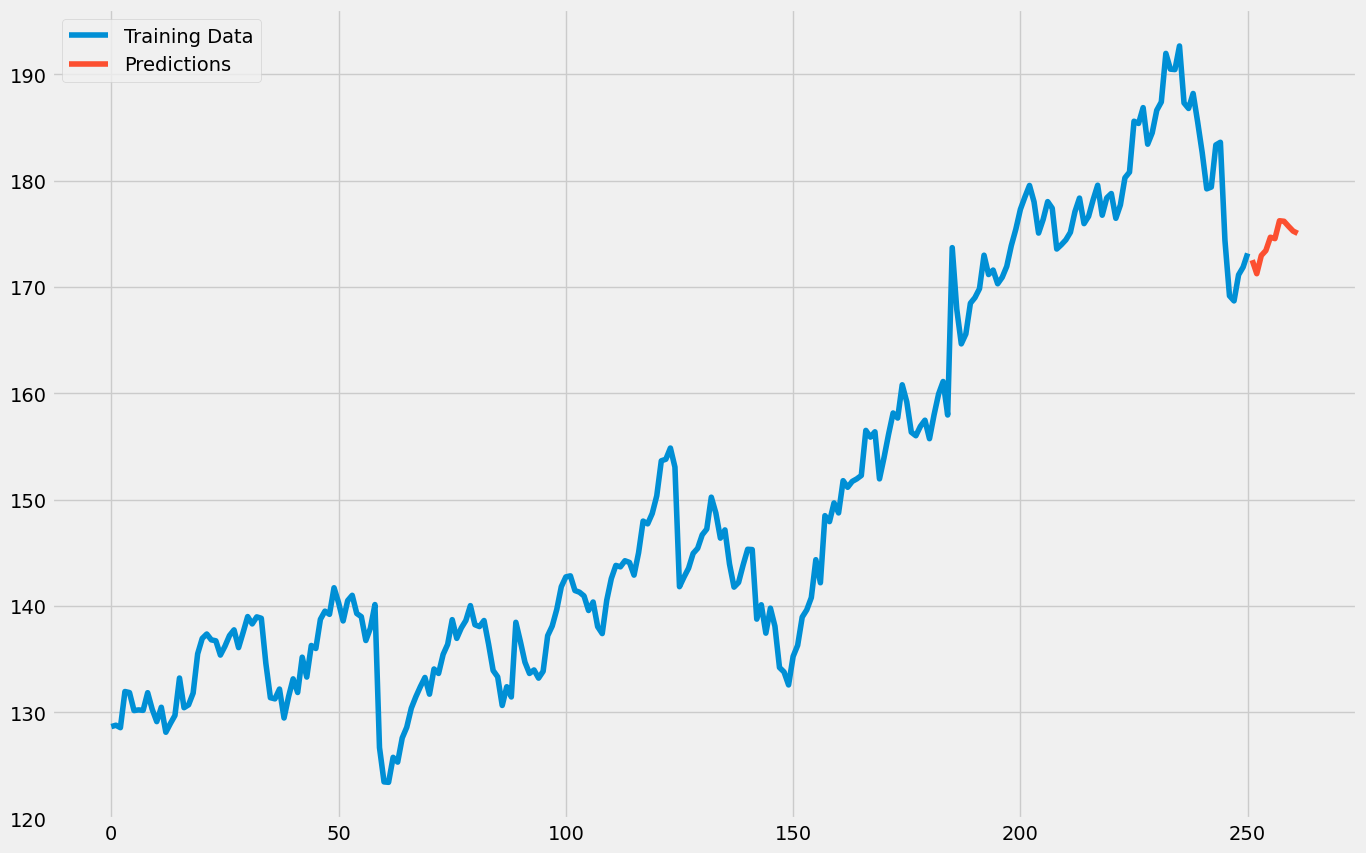

In [16]:
data["Close"].plot(legend=True, label="Training Data", figsize=(15, 10))
predictions.plot(legend=True, label="Predictions")